In [7]:
#importing libraries

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import glob

In [8]:
# importing the data files

df19 = pd.read_csv('year_2019_sf.csv')
df20 = pd.read_csv('year_2020_sf.csv')

/Users/kratipatidar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/kratipatidar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,19,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
# setting the data-type of 'launched_at' column to datetime

df19['launched_at'] = pd.to_datetime(df19['launched_at'])
df20['launched_at'] = pd.to_datetime(df20['launched_at'])

In [11]:
# setting 'launched_at' as index for both the dataframes

df19.set_index('launched_at', inplace=True)
df20.set_index('launched_at', inplace=True)

In [58]:
# here we check for NaN values
print(df19['country_displayable_name'].isnull().sum())
print(df20['country_displayable_name'].isnull().sum())

333824
0


In [75]:
# since there are 333,824 records missing in df19, we will create another column to tackle the missing values

## first we try to get list of the country codes along with their full names
cons = df19[['country','country_displayable_name']].dropna()
cons = cons.drop_duplicates()

## next we will define two lists
con_acr = list(cons['country'])
con_full = list(cons['country_displayable_name'])

## correcting the names of the countries to remove 'the'
for n, i in enumerate(con_full):
    if i == 'the United States':
        con_full[n] = 'United States'
    elif con_full[n] == 'the United Kingdom':
        con_full[n] = 'United Kingdom'
    elif con_full[n] == 'the Netherlands':
        con_full[n] = 'Netherlands'
        

## creating a dictionary
acr_full = dict(zip(con_acr,con_full))
acr_full

## mapping these values into a new column of df19 and df20 (to maintain similarity)
df19['country_name'] = df19['country'].map(acr_full)
df20['country_name'] =df20['country'].map(acr_full)

In [76]:
# grouping both the dataframes by country and dates to plot monthly project counts

monthly_19 = pd.DataFrame(df19.groupby([pd.Grouper(freq='M'), 'country_name'])['blurb'].count()).reset_index()
monthly_20 = pd.DataFrame(df20.groupby([pd.Grouper(freq='M'), 'country_name'])['blurb'].count()).reset_index()

In [77]:
# renaming the columns of the two dataframes

monthly_19.rename(columns={'blurb': 'ProjectCount'}, inplace=True)
monthly_20.rename(columns={'blurb': 'ProjectCount'}, inplace=True)

In [78]:
# setting months 

monthly_19['month'] = pd.DatetimeIndex(monthly_19['launched_at']).month
monthly_20['month'] = pd.DatetimeIndex(monthly_20['launched_at']).month

In [79]:
# defining months
month_number = monthly_19['month'].unique()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# creating a dictionary
months = dict(zip(month_number, month_names))

# mapping to the dataframes
monthly_19['month_name'] = monthly_19['month'].map(months)
monthly_20['month_name'] = monthly_20['month'].map(months)

In [127]:
# defining plot function

def comparison_plot(country):
    # getting data for specific country
    con_data_19 = monthly_19.loc[monthly_19.country_name == country, :]
    con_data_20 = monthly_20.loc[monthly_20.country_name == country, :]
    # plotting
    # Use white grid plot background from seaborn
    sns.set(font_scale=1, style="whitegrid")
    #setting up plot
    fig = plt.figure(figsize=(7,5), dpi=120)
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot('month_name', 'ProjectCount', data=con_data_19, color='green', label='Project Count in 2019')
    ax2.plot('month_name', 'ProjectCount', data=con_data_20, color='blue', label='Project Count in 2020')
    fig.legend(bbox_to_anchor = (1.25,.9))
    ax1.set_xlabel('Month of the Year')
    ax1.set_ylabel('Project Count in 2019')
    ax2.set_ylabel('Project Count in 2020')
    ax1.set_title('Monthly Project Counts in 2019 and 2020 for {}'.format(country))
    #ax1.set_xticks(con_data['date'].values)
    ax1.tick_params(labelrotation=60)
    fig.tight_layout()
    
    plt.show()

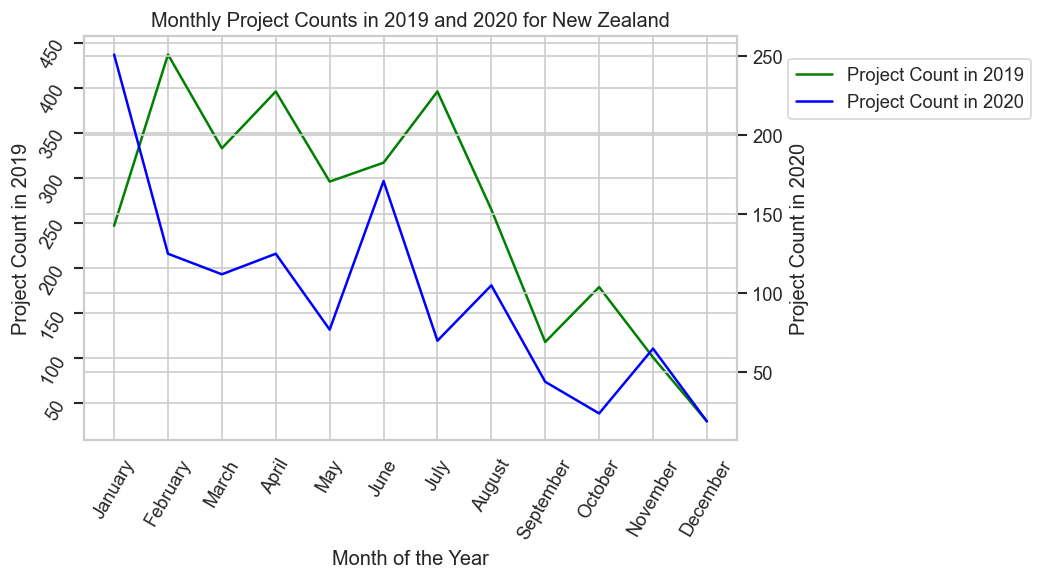

In [130]:
# plotting the graphs

comparison_plot('New Zealand')

In [82]:
# grouping by categories - 2019 and 2020
monthly_cat_19 = pd.DataFrame(df19.groupby([pd.Grouper(freq='M'), 'country_name','extracted_category'])['blurb'].count()).reset_index()
monthly_cat_20 = pd.DataFrame(df20.groupby([pd.Grouper(freq='M'), 'country_name','extracted_category'])['blurb'].count()).reset_index()

In [83]:
# renaming the columns of the two dataframes

monthly_cat_19.rename(columns={'blurb': 'ProjectCount', 'extracted_category': 'ProjectCategory'}, inplace=True)
monthly_cat_20.rename(columns={'blurb': 'ProjectCount', 'extracted_category': 'ProjectCategory'}, inplace=True)

# setting months 

monthly_cat_19['month'] = pd.DatetimeIndex(monthly_cat_19['launched_at']).month
monthly_cat_20['month'] = pd.DatetimeIndex(monthly_cat_20['launched_at']).month

# mapping the months

monthly_cat_19['month_name'] = monthly_cat_19['month'].map(months)
monthly_cat_20['month_name'] = monthly_cat_20['month'].map(months)

In [96]:
# Plotting graphs for categories

def con_cat(country, category):
    # getting data for specific country
    con19 =  monthly_cat_19.loc[monthly_cat_19.country_name == country, :]
    cat19 = con19.loc[con19.ProjectCategory == category, :]
    con20 = monthly_cat_20.loc[monthly_cat_20.country_name == country, :]
    cat20 = con20.loc[con20.ProjectCategory == category, :]

    # plotting
    # Use white grid plot background from seaborn
    sns.set(font_scale=1.2, style="whitegrid")
    #setting up plot
    fig = plt.figure(figsize=(12,8), dpi=120)
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot('month_name', 'ProjectCount', data=cat19, color='coral', 
             label= 'Trend for 2019')
    ax2.plot('month_name', 'ProjectCount', data=cat20, color='purple', 
             label= 'Trend for 2020')
    fig.legend(bbox_to_anchor = (1.15, .9))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Projects in 2019')
    ax2.set_ylabel('Number of Projects in 2020')
    ax1.set_title('Trend for {} in Category - {}'.format(country, category))
    ax1.set_xticks(cat19['month_name'])
    ax1.tick_params(labelrotation=60)
    fig.tight_layout()
    plt.show()

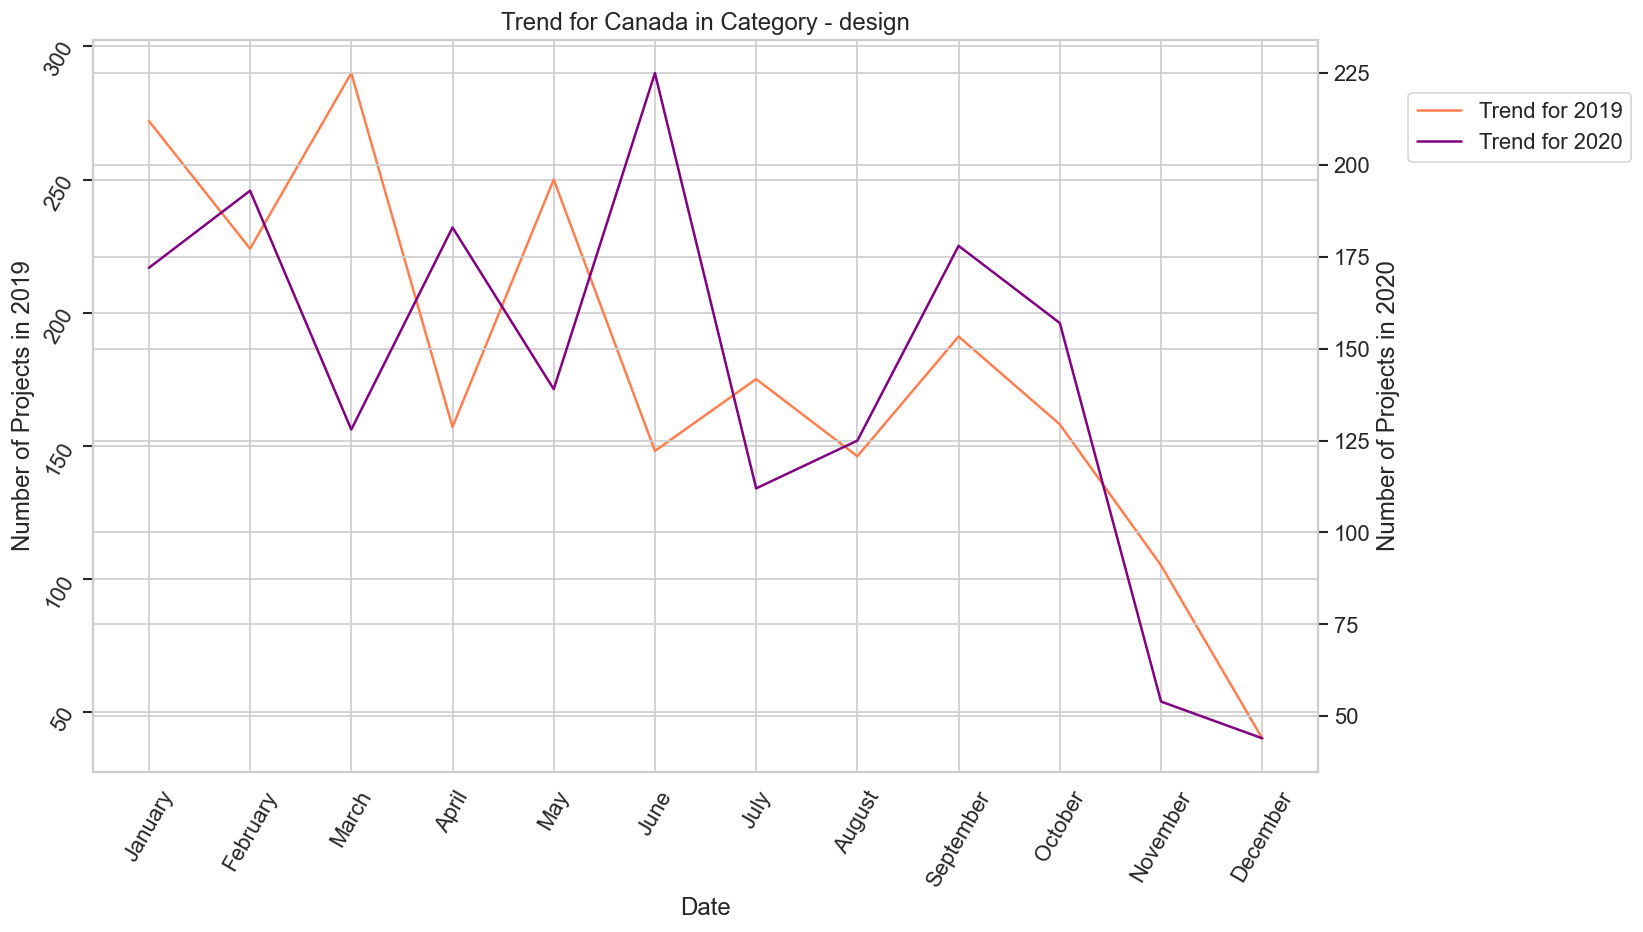

In [138]:
# looking at graphs

con_cat('Canada', 'design')

In [157]:
# plotting failed projects in each category and each funding range

def fr_percent_plots(x,y,country,category):
    #dataframe subset with the required range
    fr_xy_19 = pd.DataFrame(df19[(df19['goal'] > x) & (df19['goal'] <= y)])
    fr_xy_20 = pd.DataFrame(df20[(df20['goal'] > x) & (df20['goal'] <= y)])
    #grouping for the first plot, we generate another dataframe
    fr_grp_19 = pd.DataFrame(fr_xy_19.groupby([pd.Grouper(freq='M'), 'country_name', 
                                         'extracted_category', 'state'])['blurb'].count()).reset_index()
    fr_grp_20 = pd.DataFrame(fr_xy_20.groupby([pd.Grouper(freq='M'), 'country_name', 
                                         'extracted_category', 'state'])['blurb'].count()).reset_index()
    # pivoting the above tables 
    pt19 = pd.pivot_table(fr_grp_19, index=['launched_at', 'country_name', 'extracted_category'], 
                             columns = 'state', values = 'blurb')
    pt19.reset_index(inplace=True)
    
    pt20 = pd.pivot_table(fr_grp_20, index=['launched_at', 'country_name', 'extracted_category'], 
                             columns = 'state', values = 'blurb')
    pt20.reset_index(inplace=True)
    
    #calculating the failed percentages
    pt19['failed_percent'] = (pt19['failed']/(pt19['failed']+pt19['successful']))*100
    pt20['failed_percent'] = (pt20['failed']/(pt20['failed']+pt20['successful']))*100

    # renaming some columns for plotting purposes
    pt19.rename(columns={'failed_percent': 'PercentageOfFailedProjects',
                           'extracted_category': 'ProjectCategory'}, inplace=True)
    pt20.rename(columns={'failed_percent': 'PercentageOfFailedProjects',
                           'extracted_category': 'ProjectCategory'}, inplace=True)
    # setting months
    pt19['month'] = pd.DatetimeIndex(pt19['launched_at']).month
    pt20['month'] = pd.DatetimeIndex(pt20['launched_at']).month
    
    # mapping the months
    pt19['month_name'] = pt19['month'].map(months)
    pt20['month_name'] = pt20['month'].map(months)
    
    # creating plot
    # getting data for specific country
    con_data_19 =  pt19.loc[pt19.country_name == country, :]
    con_data_20 =  pt20.loc[pt20.country_name == country, :]
    # filtering this data by category
    cat_data_19 = con_data_19.loc[con_data_19.ProjectCategory == category, :]
    cat_data_20 = con_data_20.loc[con_data_20.ProjectCategory == category, :]
    # plotting
    # Use white grid plot background from seaborn
    sns.set(font_scale=1.2, style="whitegrid")
    #setting up plot
    fig = plt.figure(figsize=(12,8), dpi=120)
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot('month_name', 'failed', data=cat_data_19, color='coral', 
             label='Number of Failed Projects in {} Category in 2019'.format(category))
    ax2.plot('month_name', 'failed', data=cat_data_20, color='purple', 
             label='Number of Failed Projects in {} Category in 2020'.format(category))
    fig.legend(bbox_to_anchor = (1.4, .9))
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Number of Failed Projects in 2019')
    ax2.set_ylabel('Number of Failed Projects in 2020')
    ax1.set_title('Trend for {} in {} Category for Funding Range b/n {} and {} (dollars) - 2019 and 2020'.format(country, category,x,y))
    ax1.set_xticks(cat_data_19['month_name'])
    ax1.tick_params(labelrotation=60)
    #ax1.annotate('figure pixels',xy=(3, 3), xycoords='data')
    fig.tight_layout()
    plt.show()
  


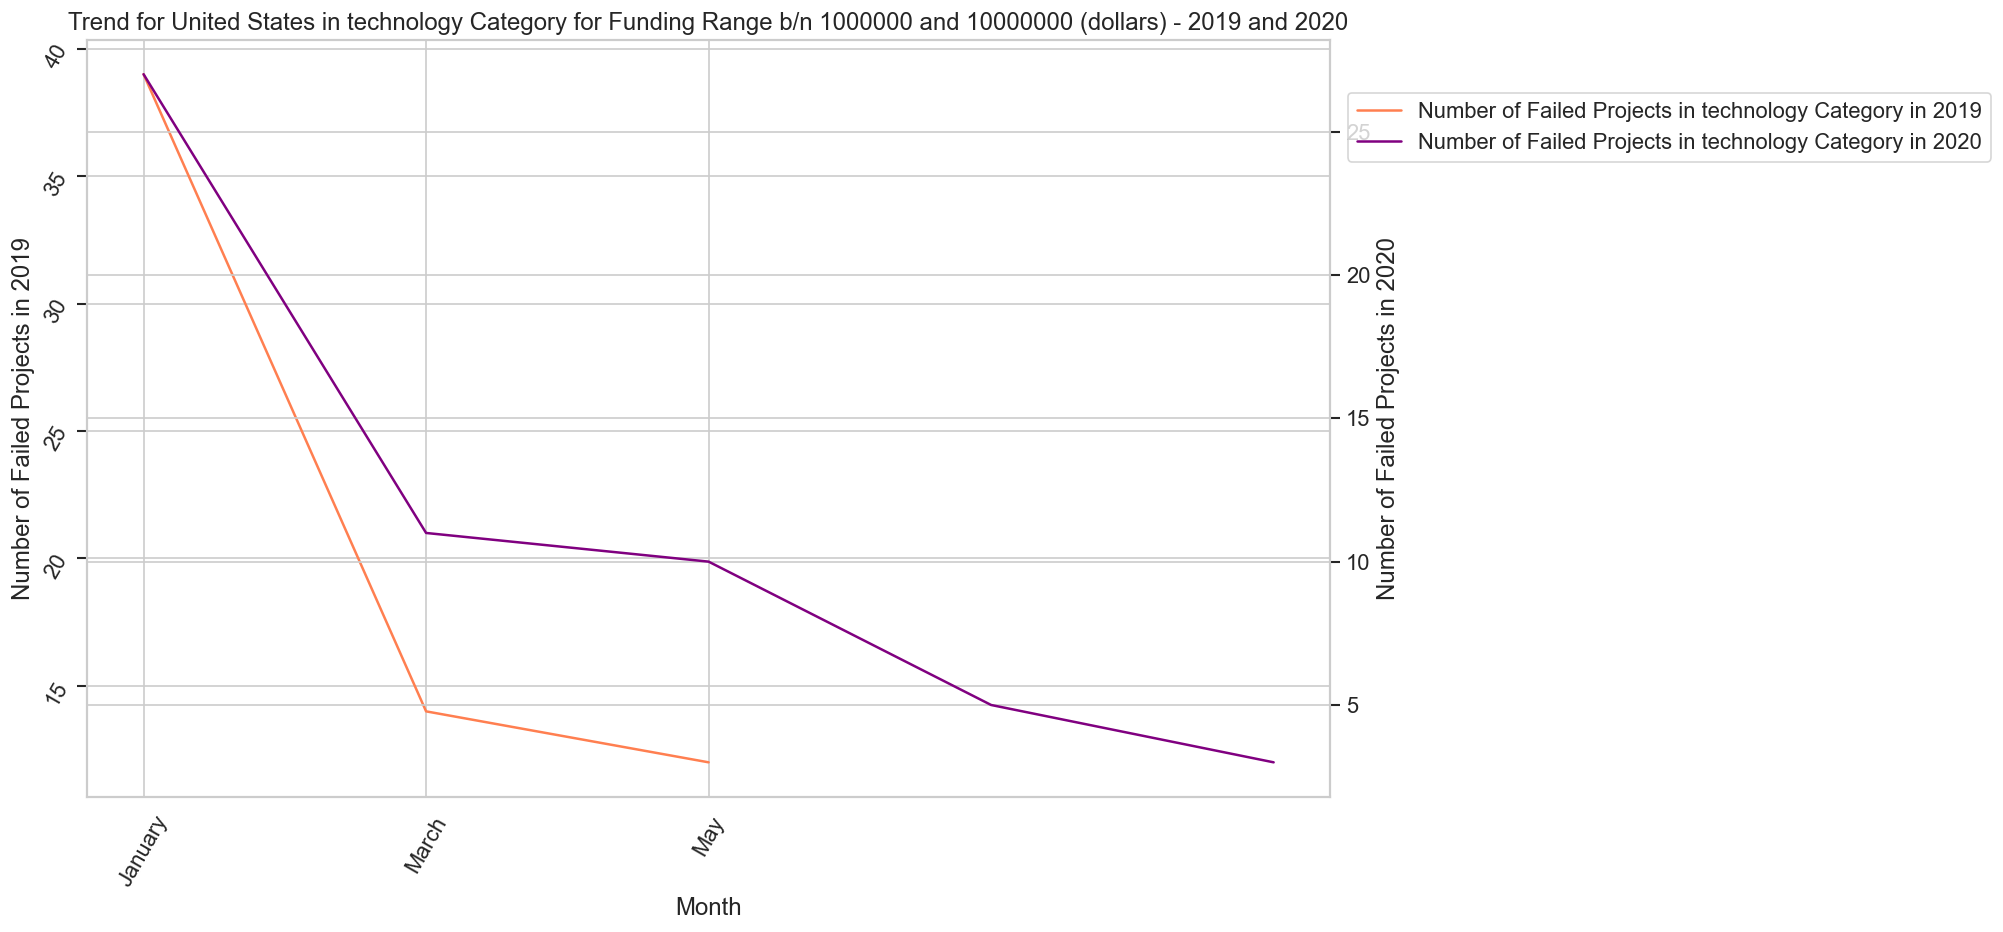

In [169]:
# plotting for different combinations of countries, categories and funding ranges
fr_percent_plots(1000000, 10000000, 'United States', 'design')

In [140]:
# we will define another plot function to plot the project counts in each category and each funding range

def fr_count_plots(x,y,country,category):
    #dataframe subset with the required range
    fr_xy_19 = pd.DataFrame(df19[(df19['goal'] > x) & (df19['goal'] <= y)])
    fr_xy_20 = pd.DataFrame(df20[(df20['goal'] > x) & (df20['goal'] <= y)])
    
    # we generate another dataframe
    fr_grp_19 = pd.DataFrame(fr_xy_19.groupby([pd.Grouper(freq='M'), 'country_name', 
                                         'extracted_category'])['blurb'].count()).reset_index()
    fr_grp_20 = pd.DataFrame(fr_xy_20.groupby([pd.Grouper(freq='M'), 'country_name', 
                                         'extracted_category'])['blurb'].count()).reset_index()
    
    # setting months
    fr_grp_19['month'] = pd.DatetimeIndex(fr_grp_19['launched_at']).month
    fr_grp_20['month'] = pd.DatetimeIndex(fr_grp_20['launched_at']).month
    
    # mapping the months
    fr_grp_19['month_name'] = fr_grp_19['month'].map(months)
    fr_grp_20['month_name'] = fr_grp_20['month'].map(months)
    
    # renaming some columns for plotting purposes
    fr_grp_19.rename(columns={'extracted_category': 'ProjectCategory', 'blurb': 'ProjectCount'}, inplace=True)
    fr_grp_20.rename(columns={'extracted_category': 'ProjectCategory', 'blurb': 'ProjectCount'}, inplace=True)
    
    # creating plot
    # getting data for specific country
    con_data_19 =  fr_grp_19.loc[fr_grp_19.country_name == country, :]
    con_data_20 =  fr_grp_20.loc[fr_grp_20.country_name == country, :]
    
    # filtering this data by category
    cat_data_19 = con_data_19.loc[con_data_19.ProjectCategory == category, :]
    cat_data_20 = con_data_20.loc[con_data_20.ProjectCategory == category, :]
    
    # plotting
    # Use white grid plot background from seaborn
    sns.set(font_scale=1.2, style="whitegrid")
    #setting up plot
    fig = plt.figure(figsize=(12,8), dpi=120)
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot('month_name', 'ProjectCount', data=cat_data_19, color='green', 
             label='Trend for 2019')
    ax2.plot('month_name', 'ProjectCount', data=cat_data_20, color='red', 
             label= 'Trend for 2020')
    fig.legend(bbox_to_anchor = (1.15, .9))
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Number of Projects in 2019 in Category - {}'.format(category))
    ax2.set_ylabel('Number of Projects in 2020 in Category - {}'.format(category))
    ax1.set_title('Trend for {} in {} Category for Funding Range b/n {} and {} (dollars) - 2019 and 2020'.format(country, category,x,y))
    ax1.set_xticks(cat_data_19['month_name'])
    ax1.tick_params(labelrotation=60)
    
    fig.tight_layout()
    plt.show()
    

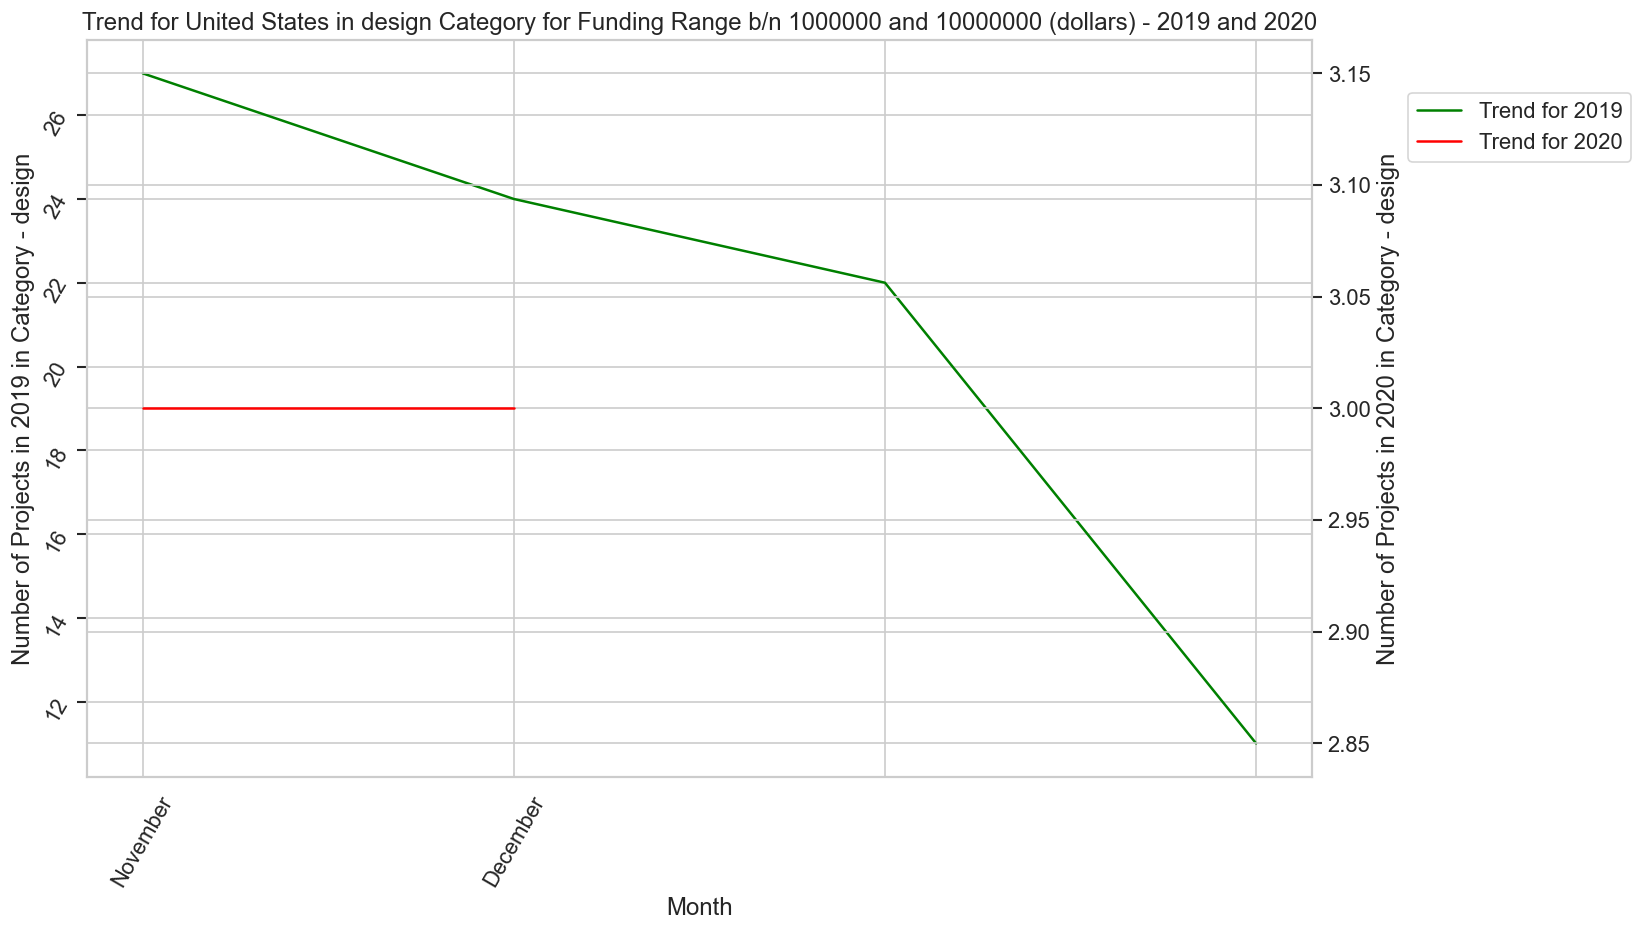

In [156]:
# looking at different plots

fr_count_plots(1000000, 10000000, 'United States', 'design')